In [20]:
import nltk # language processing
import os # operation system
import numpy as np
import pandas as pd
import matplotlib


#tokenizer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk import FreqDist
from nltk import pos_tag
from nltk import collocations
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

def plotFreqDistAsBarChart(fdist,n):
    words = [x[0] for x in fdist.most_common(n)]
    values = [x[1] for x in fdist.most_common(n)]
    matplotlib.style.use('ggplot')
    
    d = {'values': values}
    df = pd.DataFrame(d)


    ax = df.plot(kind='bar',legend=False,title='Word Frequencies for Most Common Words')
    ax.set_xticklabels(words)
    ax.set_xlabel("Words",fontsize=12)
    ax.set_ylabel("Occurrences",fontsize=12)

    plt.show()

In [21]:
with open("/home/retkowski/data/bbc/business/Great Western rail modernisation costs rocket, says NAO.txt") as f:
    string = f.read()
    f.close()

In [22]:
def text_length(text):
    return len(word_tokenize(text))

In [23]:
def number_paragraphs(text):
    return round(text.count('\n') / 2)

In [24]:
def average_length_sent(text):
    return len(word_tokenize(string)) / len(sent_tokenize(string))

In [25]:
def average_length_word(text):
    word_length_list = []
    for word in word_tokenize(text):
        word_length_list.append(len(word))
    return np.average(word_length_list)
    

In [26]:
def count_pos(text):
    pos = {}
    tagged = nltk.pos_tag(word_tokenize(text))
    for tag in tagged:
        speech_tag = tag[1]
        pos[speech_tag] = pos.get(speech_tag, 0) + 1
    return pos

In [27]:
print(sent_tokenize(string)[3])

Yesterday the government said electrification of four short parts of the network would now be "deferred".


In [28]:
print("Number of Paragraphs:",number_paragraphs(string))

Number of Paragraphs: 32


In [29]:
print("Average amount of characters per word: ",average_length_word(string))

Average amount of characters per word:  4.53452685422


In [30]:
print("Average of words per sentence: ",average_length_sent(string))

Average of words per sentence:  31.28


In [31]:
print("Text consists of",text_length(string),"words")

Text consists of 782 words


In [32]:
print(count_pos(string))
print("Amount of Noun (singular):",count_pos(string)["NN"])

{'VBG': 13, '.': 25, ',': 30, 'NNP': 51, 'RBR': 1, 'MD': 15, 'WDT': 6, 'DT': 73, 'JJR': 14, 'CC': 27, "''": 9, 'TO': 25, 'PRP$': 1, 'VBZ': 17, 'JJ': 47, 'PRP': 17, 'EX': 1, ':': 5, 'VB': 39, 'NNS': 44, 'VBD': 28, 'NN': 107, 'RP': 3, 'VBP': 8, 'CD': 14, 'POS': 5, ')': 1, '(': 1, 'PDT': 1, 'IN': 78, 'VBN': 28, 'RB': 36, '``': 9, 'WRB': 3}
Amount of Noun (singular): 107


In [33]:
def number_of_symbol(text, symbol):
    return text.count(symbol)

In [34]:
def number_of_currency_symbols(text):
    currencies = ["£","€","$","¥","¢","₩"]
    sum = 0
    for currency in currencies:
        sum += number_of_symbol(text, currency)
    return sum

def lexical_richness(text):
    return len(set(word_tokenize(string))) / len(word_tokenize(string)) # would be better after removing punctuation

In [35]:
print("Number of Currency Symbols: " + str(number_of_currency_symbols(string)))
print("Number of Paragraphs: " + str(number_of_symbol(string, "§")))
print("Number of Question Marks: " + str(number_of_symbol(string, "?")))
print("Number of Percentages: " + str(number_of_symbol(string, "%")))
print("Number of Bangs: " + str(number_of_symbol(string, "!")))

Number of Currency Symbols: 3
Number of Paragraphs: 0
Number of Question Marks: 0
Number of Percentages: 1
Number of Bangs: 0


In [36]:
print("Number of Tokens: ", len(word_tokenize(string)))
#print(len(sorted(word_tokenize(string))))
print("Number of Distinct Tokens: ", len(set(sorted(word_tokenize(string)))))
print("Lexical Richness: ", lexical_richness(string))

Number of Tokens:  782
Number of Distinct Tokens:  342
Lexical Richness:  0.4373401534526854


# Word Frequency

<FreqDist with 342 samples and 782 outcomes>
[('the', 50), (',', 30), ('to', 25), ('.', 25), ('and', 21), ('of', 18), ('in', 11), ('that', 10), ("''", 9), ('for', 9), ('``', 9), ('The', 8), ('trains', 8), ('new', 8), ('a', 8), ('not', 7), ('government', 6), ('had', 6), ('have', 6), ('is', 6)]


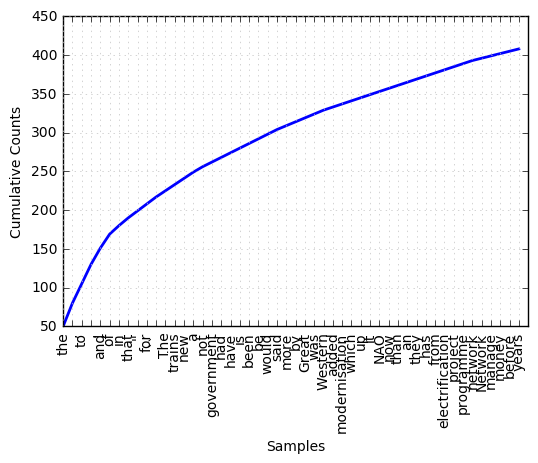

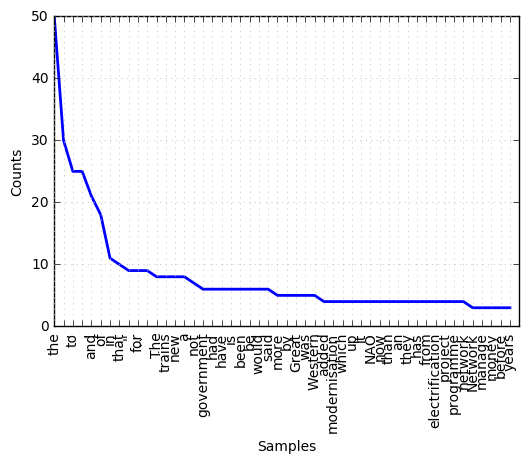

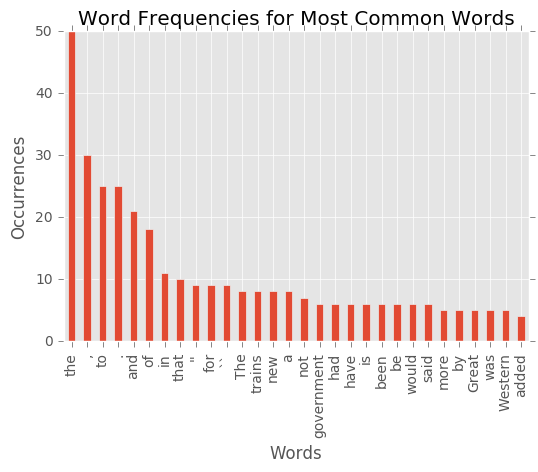

In [37]:
fdist = FreqDist(word_tokenize(string))
print(fdist)
print(fdist.most_common(20))
fdist.plot(50, cumulative=True)
fdist.plot(50)
plotFreqDistAsBarChart(fdist,30)

In [38]:
print("Hapaxes / Words that only occur once: \n")
print(fdist.hapaxes())

Hapaxes / Words that only occur once: 

['all', 'element', 'makes', 'arriving', 'reconsidered', 'replacing', 'feasible', 'describing', 'Analysis', 'elements', 'Modernisation', 'out', 'bear', 'gets', 'them', 'deferred', 'expensive', 'predicted', 'therefore', 'eventually', 'underestimated', 'When', 'London', 'projects', 'fitted', 'completed', 'short', 'old', 'Meg', 'Office', 'unrealistic', 'Yesterday', '36', 'means', 'different', 'crucial', 'public', 'timescale', 'four', 'operator', 'multi-billion', 'integrate', 'auditor', 'head', '£2.1bn', 'start', 'FirstGroup', 'ordered', 'MP', 'failure', 'engines', 'need', 'going', 'into', 'identified', 'change', 'Mr', 'joined', 'South', 'still', 'can', 'brand', 'overall', 'actually', 'forced', 'extent', 'repeated', 'rise', 'slower', 'stock', 'accounts', 'why', 'Among', 'mean', 'order', 'Rails', 'should', 'Cardiff', 'significant', 'stretches', 'months', 'blame', 'but', 'Richard', 'revenue', 'anywhere', 'under', 'Scotland', 'at', 'peak', 'Image', 'huge

In [39]:
long_words = [w for w in set(word_tokenize(string)) if len(w) > 10]
print(long_words)

['reconsidered', 'Modernisation', 'significant', 'underestimated', 'unrealistic', 'multi-billion', 'electrifying', 'infrastructure', 'reconfigured', 'electrification', 'all-electric', 'overcrowded', 'encouraging', 'particularly', 'modernisation', 'parliamentary', 'Correspondent', 'sufficiently', 'replacement']


Eliminating frequent short words (e.g., the) and infrequent long words (e.g. antiphilosophists)

In [40]:
print(sorted(w for w in set(word_tokenize(string)) if len(w) > 7 and fdist[w] > 2))

['Transport', 'electrification', 'government', 'modernisation', 'passengers', 'problems', 'programme']


# Lowercase

In [41]:
words = [w for w in word_tokenize(string) if w.isalnum()]
loweredTokens = [w.lower() for w in words]

# Stopwords
There is also a corpus of stopwords, that is, high-frequency words like the, to and also that we sometimes want to filter out of a document before further processing. Stopwords usually have little lexical content, and their presence in a text fails to distinguish it from other texts.

In [42]:
stpwords = stopwords.words('english') # removes I, me, my etc. and some of the fillers
def content_fraction(text):
    content = [w for w in loweredTokens if w not in stpwords]
    return len(content) / len(text)

print("Content Fraction: ", content_fraction(loweredTokens))

contentWords = [w for w in loweredTokens if w not in stpwords]

Content Fraction:  0.5579710144927537


# Stemming
Normalizing words: lowercase, remove affixes

In [43]:
porter = nltk.PorterStemmer()
lancaster = nltk.LancasterStemmer()
snowball = SnowballStemmer("english")
wordsPorter = [porter.stem(t) for t in contentWords]
wordsLancaster = [lancaster.stem(t) for t in contentWords]
wordsSnowball = [snowball.stem(t) for t in contentWords]
print("Number of Distinct Tokens (stemmed by Porter): ", len(set(wordsPorter)))
print("Number of Distinct Tokens (stemmed by Lancaster): ", len(set(wordsLancaster)))
print("Number of Distinct Tokens (stemmed by Snowball): ", len(set(wordsSnowball)))

Number of Distinct Tokens (stemmed by Porter):  230
Number of Distinct Tokens (stemmed by Lancaster):  227
Number of Distinct Tokens (stemmed by Snowball):  230


<FreqDist with 227 samples and 385 outcomes>
[('new', 8), ('train', 8), ('network', 7), ('cost', 6), ('govern', 6), ('would', 6), ('said', 6), ('plan', 5), ('year', 5), ('gre', 5), ('elect', 5), ('western', 5), ('modern', 5), ('project', 5), ('program', 4), ('depart', 4), ('ad', 4), ('nao', 4), ('passeng', 4), ('rail', 3)]


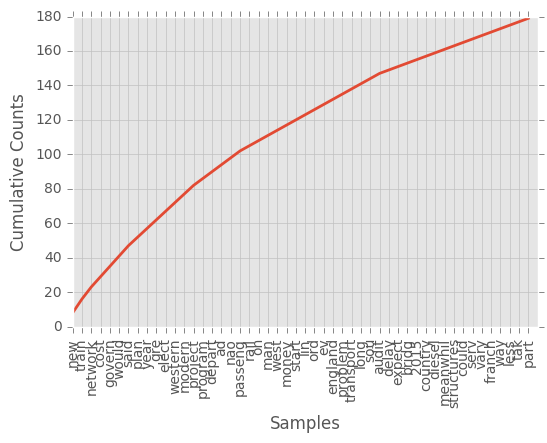

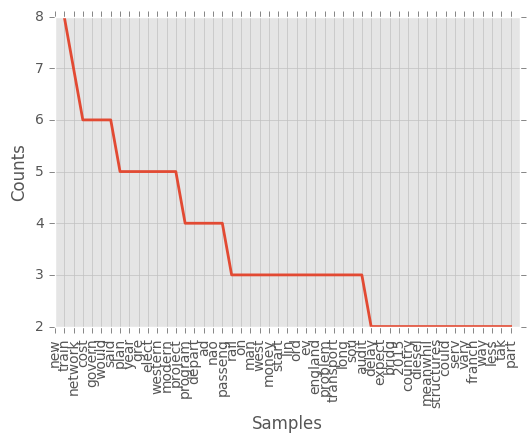

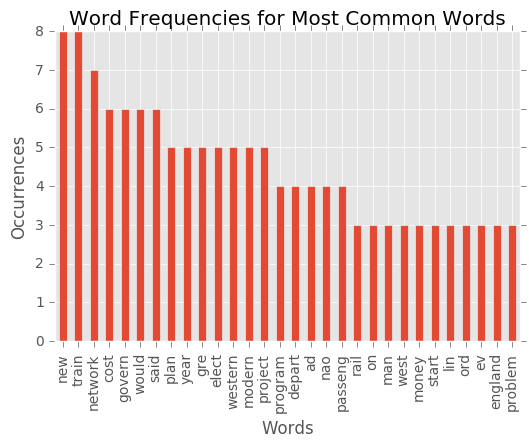

In [44]:
fdist = FreqDist(wordsLancaster)
print(fdist)
print(fdist.most_common(20))
fdist.plot(50, cumulative=True)
fdist.plot(50)
plotFreqDistAsBarChart(fdist,30)

# Lemmatization
WordNet lemmatizer only removes affixes if the resulting word is in its dictionary

In [45]:
wnl = nltk.WordNetLemmatizer()
lemmedWords = [wnl.lemmatize(t) for t in contentWords]
print("Number of Distinct Tokens (lammed by WordNet): ", len(set(lemmedWords)))

Number of Distinct Tokens (lammed by WordNet):  243


<FreqDist with 243 samples and 385 outcomes>
[('train', 8), ('new', 8), ('network', 7), ('government', 6), ('cost', 6), ('would', 6), ('said', 6), ('year', 5), ('great', 5), ('modernisation', 5), ('western', 5), ('project', 5), ('passenger', 4), ('added', 4), ('department', 4), ('electrification', 4), ('nao', 4), ('programme', 4), ('plan', 3), ('line', 3)]


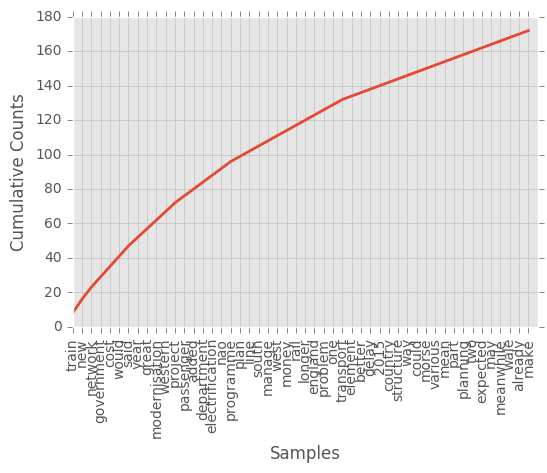

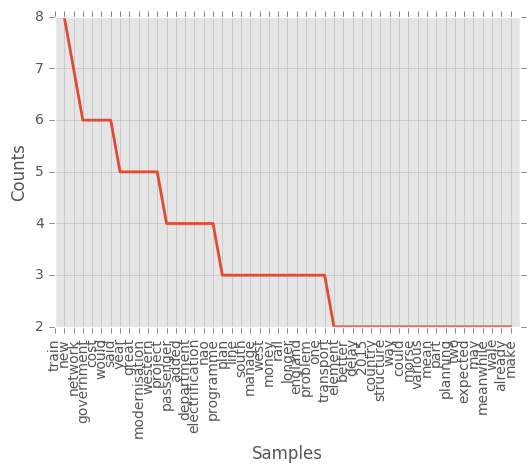

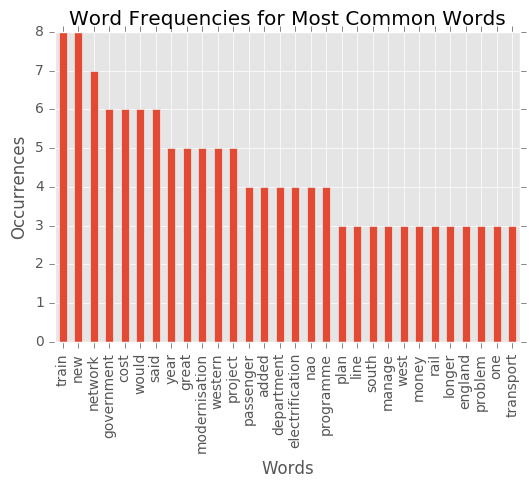

In [46]:
fdist = FreqDist(lemmedWords)
print(fdist)
print(fdist.most_common(20))
fdist.plot(50, cumulative=True)
fdist.plot(50)
plotFreqDistAsBarChart(fdist,30)

Bag-Of-Words: https://en.wikipedia.org/wiki/Bag-of-words_model

tf-idf: https://en.wikipedia.org/wiki/Tf%E2%80%93idf

http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
preprocessed_text= ' '.join(lemmedWords)
print(preprocessed_text)

image copyright pa government blamed huge extra cost lengthy delay modernisation great western railway network england wale national audit office nao say estimated cost project since 2013 shot meanwhile delay added 18 36 month project timescale yesterday government said electrification four short part network would deferred audit office report put blame project problem firmly poor government planning said modernisation plan case study manage major programme 2015 department transport plan manage project make great western route modernisation industry programme sufficiently joined way said amyas morse head nao great western network stretch london south wale south west england particularly busy overcrowded number passenger arriving paddington daily peak period predicted rise 81 five year analysis richard westcott transport correspondent take longer electrify line government forced change pound order new train fitted diesel engine go anywhere make heavier mean expensive run polluting damag

In [82]:
vectorizer = CountVectorizer(min_df=1)
X_exp = vectorizer.fit_transform([preprocessed_text])
#print("||".join(vectorizer.get_feature_names()))
print(X_exp.shape)
print(X_exp.toarray())
print(X_exp)
#print(X_exp.getnnz())

#X_exp = vectorizer.fit_transform(["Das ist ein Test", "Dies ist ein Test Test"])
#XX_exp = vectorizer.transform(["Dies ist kein Test"])
#print(XX_exp.toarray())

(1, 243)
[[1 1 1 2 1 1 1 1 1 4 1 1 2 2 1 1 1 1 1 1 2 1 1 1 2 1 1 1 2 1 1 1 1 1 2 1 1
  1 1 1 1 1 1 1 6 2 2 1 1 1 1 1 2 4 1 1 1 1 2 1 1 1 4 1 1 2 1 1 3 1 2 2 1 2
  1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 6 5 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  2 1 3 1 1 3 1 1 2 3 2 2 1 2 1 1 5 1 3 1 2 1 1 1 4 1 1 7 8 1 1 2 2 1 3 1 1
  1 1 1 1 1 1 1 1 2 1 4 1 1 1 1 1 3 2 1 1 1 1 1 1 3 1 4 5 1 2 3 1 1 1 1 1 1
  1 1 1 1 1 1 1 2 6 1 1 1 1 2 1 1 1 2 1 3 1 2 1 1 1 2 1 1 1 1 2 1 1 2 1 1 1
  1 8 3 2 1 1 1 1 1 1 2 1 2 2 3 1 5 2 6 5 1]]
  (0, 30)	1
  (0, 173)	1
  (0, 32)	1
  (0, 10)	1
  (0, 221)	1
  (0, 227)	1
  (0, 216)	1
  (0, 205)	1
  (0, 48)	1
  (0, 105)	1
  (0, 78)	1
  (0, 101)	1
  (0, 6)	1
  (0, 176)	1
  (0, 40)	1
  (0, 155)	1
  (0, 35)	1
  (0, 132)	1
  (0, 96)	1
  (0, 125)	1
  (0, 231)	1
  (0, 7)	1
  (0, 182)	1
  (0, 207)	1
  (0, 220)	1
  :	:
  (0, 202)	2
  (0, 175)	5
  (0, 70)	2
  (0, 194)	1
  (0, 135)	4
  (0, 143)	2
  (0, 20)	2
  (0, 136)	1
  (0, 234)	2
  (0, 68)	3
  (0, 138)	7
  (0, 179)	1
  (0, 238)	5
  (0

In [79]:
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=False).fit(X_exp)
X_exp_tf = tf_transformer.transform(X_exp)
print(X_exp_tf.toarray())

[[ 0.03189505  0.03189505  0.03189505  0.06379009  0.03189505  0.03189505
   0.03189505  0.03189505  0.03189505  0.12758019  0.03189505  0.03189505
   0.06379009  0.06379009  0.03189505  0.03189505  0.03189505  0.03189505
   0.03189505  0.03189505  0.06379009  0.03189505  0.03189505  0.03189505
   0.06379009  0.03189505  0.03189505  0.03189505  0.06379009  0.03189505
   0.03189505  0.03189505  0.03189505  0.03189505  0.06379009  0.03189505
   0.03189505  0.03189505  0.03189505  0.03189505  0.03189505  0.03189505
   0.03189505  0.03189505  0.19137028  0.06379009  0.06379009  0.03189505
   0.03189505  0.03189505  0.03189505  0.03189505  0.06379009  0.12758019
   0.03189505  0.03189505  0.03189505  0.03189505  0.06379009  0.03189505
   0.03189505  0.03189505  0.12758019  0.03189505  0.03189505  0.06379009
   0.03189505  0.03189505  0.09568514  0.03189505  0.06379009  0.06379009
   0.03189505  0.06379009  0.03189505  0.03189505  0.06379009  0.03189505
   0.03189505  0.03189505  0.03189505 

In [80]:
tfidf_transformer = TfidfTransformer()
X_exp_tfidf = tfidf_transformer.fit_transform(X_exp)
print(X_exp_tfidf.toarray())

[[ 0.03189505  0.03189505  0.03189505  0.06379009  0.03189505  0.03189505
   0.03189505  0.03189505  0.03189505  0.12758019  0.03189505  0.03189505
   0.06379009  0.06379009  0.03189505  0.03189505  0.03189505  0.03189505
   0.03189505  0.03189505  0.06379009  0.03189505  0.03189505  0.03189505
   0.06379009  0.03189505  0.03189505  0.03189505  0.06379009  0.03189505
   0.03189505  0.03189505  0.03189505  0.03189505  0.06379009  0.03189505
   0.03189505  0.03189505  0.03189505  0.03189505  0.03189505  0.03189505
   0.03189505  0.03189505  0.19137028  0.06379009  0.06379009  0.03189505
   0.03189505  0.03189505  0.03189505  0.03189505  0.06379009  0.12758019
   0.03189505  0.03189505  0.03189505  0.03189505  0.06379009  0.03189505
   0.03189505  0.03189505  0.12758019  0.03189505  0.03189505  0.06379009
   0.03189505  0.03189505  0.09568514  0.03189505  0.06379009  0.06379009
   0.03189505  0.06379009  0.03189505  0.03189505  0.06379009  0.03189505
   0.03189505  0.03189505  0.03189505 